## Imbalance data methodology

#### Imbalace data - When data distribution is not equally distributed

#### - Handling imbalance data with text data

    Ex: We will be using kaggle emotions dataset with imbalance data distribution class

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp'
od.download(dataset_url)

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read and create dataframes
train_df = pd.read_csv('emotions-dataset-for-nlp/train.txt', sep=';', header=None, names=['Text', 'Emotion'])

## EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [4]:
train_df.describe()

,Text,Emotion
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


In [5]:
train_df.head(5)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
train_df.columns

Index(['Text', 'Emotion'], dtype='object')

In [7]:
train_df['Text'][1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [8]:
train_df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

[Text(0, 0, '4666'),
 Text(0, 0, '2159'),
 Text(0, 0, '1304'),
 Text(0, 0, '572'),
 Text(0, 0, '1937'),
 Text(0, 0, '5362')]

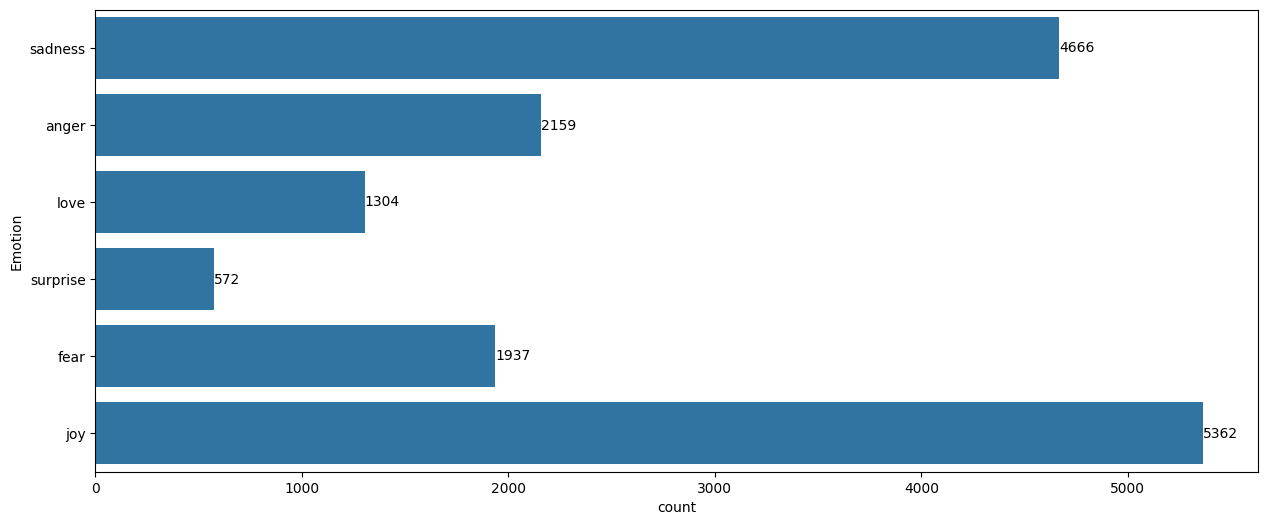

In [10]:
# plot 
f, ax = plt.subplots(figsize=(15,6))
sns.set_color_codes('dark')
ax = sns.countplot(train_df['Emotion'], stat='count')
ax.bar_label(ax.containers[0])

As from above, data is imbalance -- surprise and love seems to be in minority whereas joy and sadness is in majority

In [11]:
# !pip install imbalanced-learn -q

#### Preprocessing data for resampling

In [12]:
train_df.dtypes

Text       object
Emotion    object
dtype: object

In [13]:
# converting emotion data type into categorial

train_df_em_ct = train_df['Emotion'].astype("category")
train_df_em_ct.dtypes

CategoricalDtype(categories=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], ordered=False, categories_dtype=object)

#### Vectorization of text data

In [14]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# to process text data for resampling we'll perform vectorization

tfidf = TfidfVectorizer() 
t0 = time()
train_vec = tfidf.fit_transform(train_df['Text'])

print(f"Vectorization done in {time() - t0:.4f} s")

Vectorization done in 0.1619 s


In [16]:
train_df.shape

(16000, 2)

In [17]:
train_vec.shape # curse of dimentionality

(16000, 15186)

In [18]:
train_df_em_ct.shape

(16000,)

- **Oversampling**
    - SMOTNEC (for categorial data with dataframe)
    - input (X, y)
        - X: data to be resampled (csr_matrix -- shape:(n_samples, n_features))
        - y: categorial features corresponds to the data (X) (shape(n_samples, ))
    - sampling_strategy
        - minority: resample only the minority class
        - not majority: resample all classes but the majority class
        - not minority: resample all classes but the minority class
        - all: resample all classes

In [19]:
from imblearn.over_sampling import SMOTENC

In [20]:
def sampling(strategy):
    sm = SMOTENC(sampling_strategy=strategy, random_state=42, categorical_features=[0,1,2,3,4,5])

    X = train_vec          # data to resample
    y = train_df_em_ct     # categorial features corresponds to the data (X)

    x_resample, y_resample = sm.fit_resample(X, y)
    return x_resample, y_resample

#### Sampling: minority

In [21]:
t0 = time()
X_res, y_res = sampling(strategy='minority')
print(f"(minority) resampling done in {time() - t0:.3f} s")

(minority) resampling done in 3.213 s


In [22]:
print("X shape", X_res.shape)
print("y shape", y_res.shape)

X shape (20790, 15186)
y shape (20790,)


[Text(0, 0, '2159'),
 Text(0, 0, '1937'),
 Text(0, 0, '5362'),
 Text(0, 0, '1304'),
 Text(0, 0, '4666'),
 Text(0, 0, '5362')]

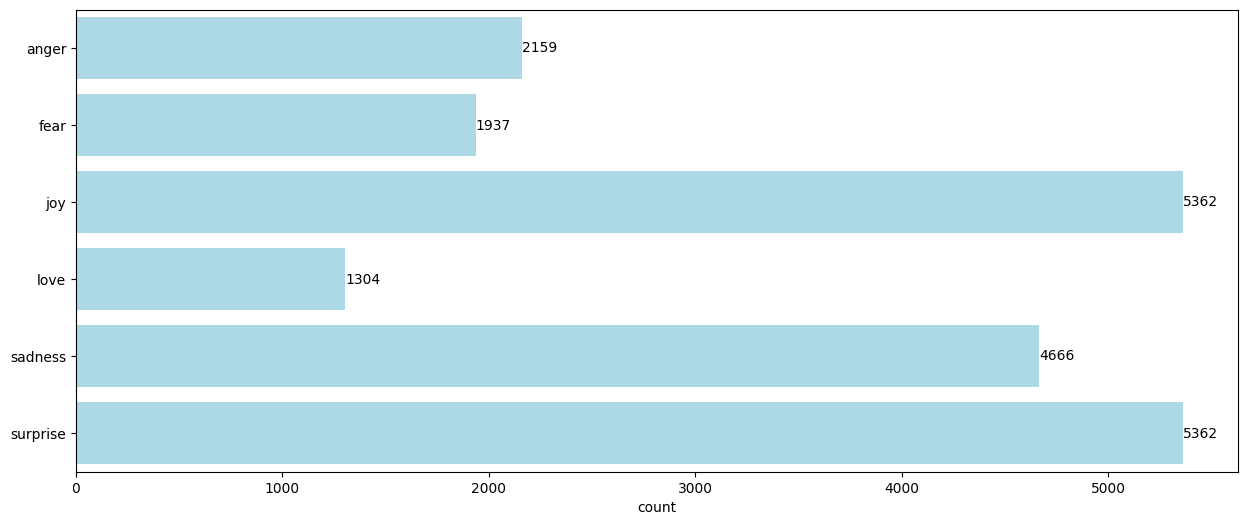

In [23]:
# plot 
f, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(y_res.values, saturation = 1, color = "lightblue")
ax.bar_label(ax.containers[0])

#### Sampling: not majority

In [24]:
t0 = time()
X_res, y_res = sampling(strategy='not majority')
print(f"(not majority) resampling done in {time() - t0:.3f} s")

(not majority) resampling done in 7.060 s


In [25]:
print("X shape", X_res.shape)
print("y shape", y_res.shape)

X shape (32172, 15186)
y shape (32172,)


[Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362')]

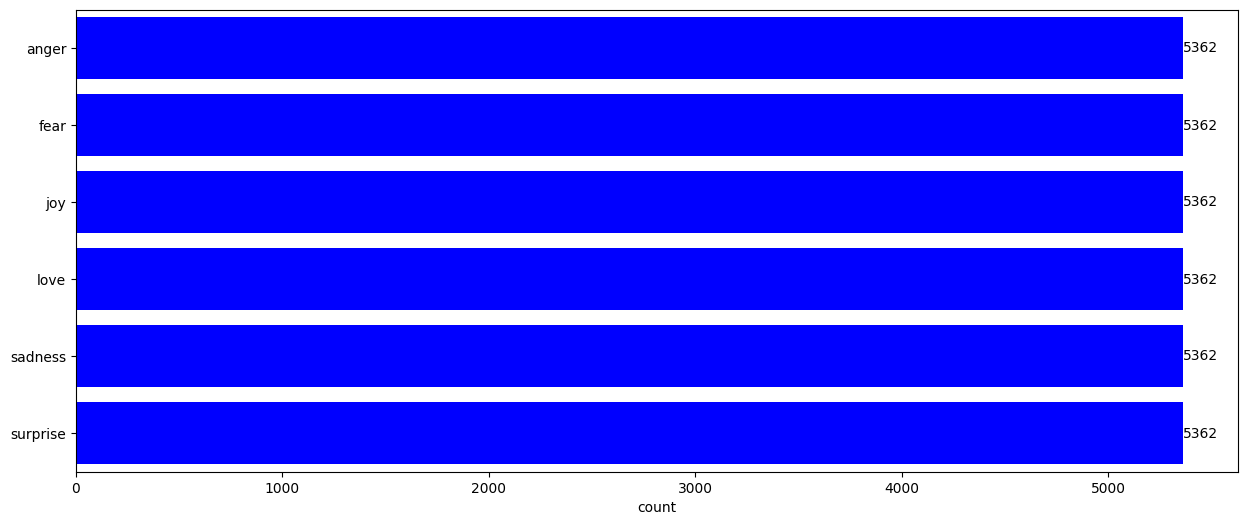

In [26]:
# plot 
f, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(y_res.values, saturation = 1, color = "blue")
ax.bar_label(ax.containers[0])

#### Sampling: not minority

In [27]:
t0 = time()
X_res, y_res = sampling(strategy='not minority')
print(f"(not minority) resampling done in {time() - t0:.3f} s")

(not minority) resampling done in 5.833 s


In [28]:
print("X shape", X_res.shape)
print("y shape", y_res.shape)

X shape (27382, 15186)
y shape (27382,)


[Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '572')]

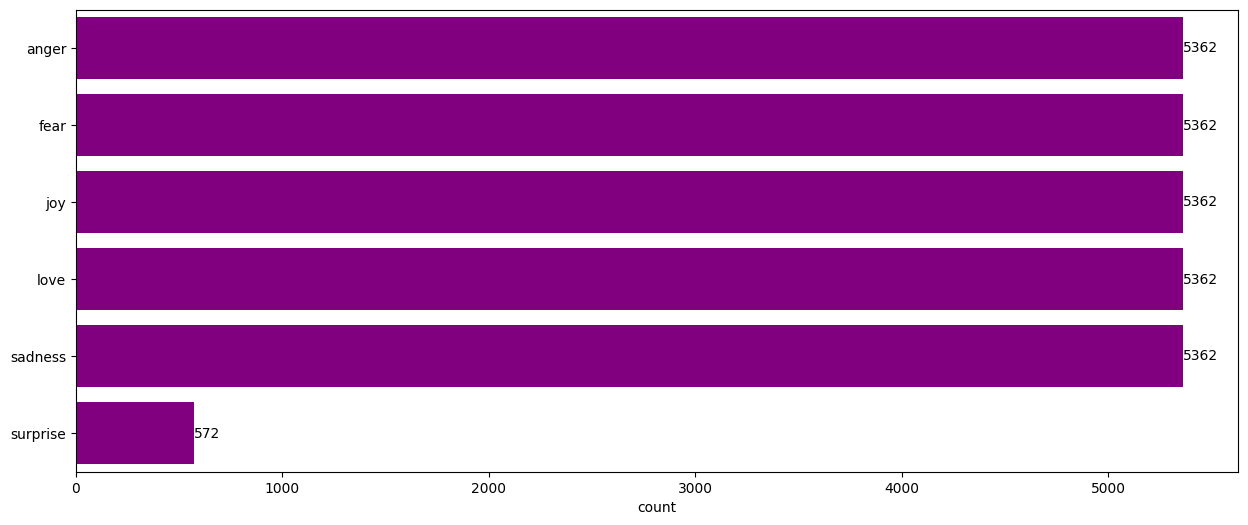

In [29]:
# plot 
f, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(y_res.values, saturation = 1, color = "purple")
ax.bar_label(ax.containers[0])

#### Sampling: all

In [30]:
t0 = time()
X_res, y_res = sampling(strategy='all')
print(f"(all) resampling done in {time() - t0:.3f} s")

(all) resampling done in 7.053 s


In [31]:
print("X shape", X_res.shape)
print("y shape", y_res.shape)

X shape (32172, 15186)
y shape (32172,)


[Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362'),
 Text(0, 0, '5362')]

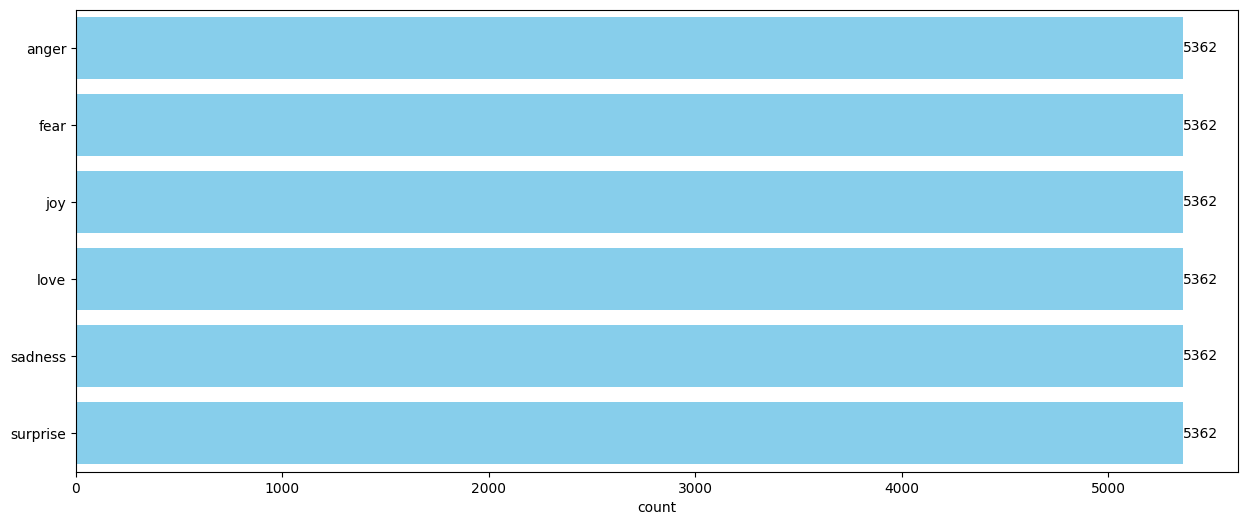

In [32]:
# plot 
f, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(y_res.values, saturation = 1, color = "skyblue")
ax.bar_label(ax.containers[0])

In [33]:
type(X_res)

scipy.sparse._csr.csr_matrix

##### Revert back to text data

In [34]:
train_df_res = tfidf.inverse_transform(X_res)

In [35]:
len(train_df_res)

32172

In [36]:
type(train_df_res)

list

In [37]:
train_df_res[:10]

[array(['didnt', 'feel', 'humiliated'], dtype='<U74'),
 array(['and', 'around', 'awake', 'being', 'can', 'cares', 'damned',
        'feeling', 'from', 'go', 'hopeful', 'hopeless', 'is', 'just', 'so',
        'someone', 'to', 'who'], dtype='<U74'),
 array(['feel', 'grabbing', 'greedy', 'im', 'minute', 'post', 'to',
        'wrong'], dtype='<U74'),
 array(['about', 'am', 'ever', 'feeling', 'fireplace', 'is', 'it', 'know',
        'nostalgic', 'on', 'property', 'still', 'that', 'the', 'will'],
       dtype='<U74'),
 array(['am', 'feeling', 'grouchy'], dtype='<U74'),
 array(['been', 'burdened', 'feeling', 'ive', 'lately', 'little', 'sure',
        'that', 'was', 'wasnt', 'why'], dtype='<U74'),
 array(['also', 'amount', 'and', 'asleep', 'been', 'but', 'fallen',
        'faster', 'feel', 'funny', 'ive', 'like', 'lot', 'milligrams',
        'or', 'recommended', 'so', 'taking', 'times'], dtype='<U74'),
 array(['about', 'as', 'confused', 'feel', 'jaded', 'life', 'man', 'old',
        'or', 'tee

In [38]:
# join str arr and create a dataframe
train_df_res_ = pd.DataFrame(train_df_res).apply(lambda x: ' '.join(item for item in x if item), axis=1) # join as col
train_df_res_[:10]

0                                didnt feel humiliated
1    and around awake being can cares damned feelin...
2         feel grabbing greedy im minute post to wrong
3    about am ever feeling fireplace is it know nos...
4                                   am feeling grouchy
5    been burdened feeling ive lately little sure t...
6    also amount and asleep been but fallen faster ...
7    about as confused feel jaded life man old or t...
8    and been feel for has have huge made performed...
9                                    feel romantic too
dtype: object

In [39]:
train_df_res_.shape

(32172,)

In [40]:
y_res.shape

(32172,)

In [41]:
y_res.values

['sadness', 'sadness', 'anger', 'love', 'anger', ..., 'surprise', 'surprise', 'surprise', 'surprise', 'surprise']
Length: 32172
Categories (6, object): ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']